
# 🌍 World CO₂ Emissions — Complete EDA

**Goal:** Produce a clean, exploratory data analysis (EDA) of `World CO2 Emission Data.csv` with:
- Data cleaning (nulls, duplicates, datatypes)
- Identify categorical vs numerical columns
- **Univariate**, **Bivariate**, and **Multivariate** visualizations
- **Correlation matrix** and **heatmap**
- Clear **comments and insights** below each chart

> **Note:** This notebook uses **matplotlib only** for charts (no seaborn), one plot per figure, and no custom colors — as requested for clean academic submission.


In [101]:

# === Setup ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Load
df = pd.read_csv("/content/World CO2 Emission Data.csv")
print("Loaded shape:", df.shape)
df.head(100)


Loaded shape: (8251, 67)


,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,..,..,..,..,..,..,..,..,..,..,0.247993267,0.288137087,0.285676733,0.304645892,0.31932128,0.358075043,0.334527205,0.378393235,0.335005743,0.344541955,0.306189911,0.404177901,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,1.339220035,1.567083039,2.05329938,1.638781282,1.363384481,1.284908406,1.443078956,1.44782683,1.4533392,1.59805471,1.556439232,1.401878353,..,..
1,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (curre...,NY.ADJ.DCO2.CD,..,..,..,..,..,..,..,..,..,..,4425302.036,5384955.564,4659698.721,5395610.633,7032164.217,8657458.825,8734877.192,11419066.67,11293415.56,13009021.47,11379711.1,14354438.77,16470068.9,21032261.08,25041617.44,32745539.35,30575972.02,31871213.56,30963769.15,31821964.38,35990789.68,35244502.16,19296048.11,19173399.23,19176964.86,19225447.47,18919823.57,18222891.95,18035698.46,14612197.68,14458393.16,15774370.89,22204415.79,28586843.49,24924545.11,38149761.98,47758797.25,61270054.25,118144479,165805569.9,248925028.9,365193644.7,326751092.1,275631280.6,263338827.2,278618004.1,264910282,276138145,291498572.4,297253521.5,284648920.8,..,..
2,Afghanistan,AFG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,5361.61,5603.93,5668.51,5712.9575,5925.005,6246.1625,7039.0725,7710.3425,8219.445,8988.0175,7712.14,6421.6875,8192.4275,8426.6375,8342.655,8496.705,8651.66,8796.81,9801.9825,9993.155,11514.525,11533.2525,11379.2825,11284.75,11476.1975,10834.435,10617.2325,10314.9575,10549.4125,10222.785,10679.11,..,..
3,Afghanistan,AFG,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,2705.2738,2786.5384,2735.0142,2767.526,2592.9576,2704.8566,2938.3992,3242.389,3532.5218,3803.225,3273.8578,2861.0682,3334.4114,3463.505,3427.2086,3575.3444,3402.8918,3324.4582,3597.9626,3863.868,4273.8564,4369.0078,4398.5098,4440.1106,4744.2494,4702.3804,4680.2688,4892.1766,4289.9782,4258.4498,4465.977,..,..
4,Afghanistan,AFG,CO2 emissions (kg per 2015 US$ of GDP),EN.ATM.CO2E.KD.GD,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.185704364,0.201059533,0.154976095,0.211501387,0.233694442,0.256024456,0.378522813,0.467413571,0.534410058,0.742222918,0.561765919,0.489964677,0.470845775,0.502926181,0.454516148,0.477468931,0.516563215,0.509189796,0.404094524,..,..
5,Afghanistan,AFG,CO2 emissions (kg per 2017 PPP $ of GDP),EN.ATM.CO2E.PP.GD.KD,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.05217654,0.056490814,0.043542953,0.059424616,0.065660101,0.071934067,0.106351893,0.131327139,0.150150848,0.208539115,0.157836904,0.137663225,0.132291471,0.141304961,0.127703407,0.13415235,0.145136499,0.143064822,0.113536665,..,..
6,Afghanistan,A


## 1) Data Cleaning

We will:
1. Inspect shape, dtypes, missing values, and duplicates  
2. Standardize column names  
3. Convert likely columns to appropriate dtypes (e.g., year → int; emissions → float)  
4. Handle missing values (numerical: median; categorical: mode)  
5. Remove duplicate rows


In [102]:
# 1.1 Basic inspection
print("Initial shape:", df.shape)
print("\nColumn info:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isna().sum())

Initial shape: (8251, 67)

Column info:
Country Name     object
Country Code     object
Series Name      object
Series Code      object
1960 [YR1960]    object
1961 [YR1961]    object
1962 [YR1962]    object
1963 [YR1963]    object
1964 [YR1964]    object
1965 [YR1965]    object
1966 [YR1966]    object
1967 [YR1967]    object
1968 [YR1968]    object
1969 [YR1969]    object
1970 [YR1970]    object
1971 [YR1971]    object
1972 [YR1972]    object
1973 [YR1973]    object
1974 [YR1974]    object
1975 [YR1975]    object
1976 [YR1976]    object
1977 [YR1977]    object
1978 [YR1978]    object
1979 [YR1979]    object
1980 [YR1980]    object
1981 [YR1981]    object
1982 [YR1982]    object
1983 [YR1983]    object
1984 [YR1984]    object
1985 [YR1985]    object
1986 [YR1986]    object
1987 [YR1987]    object
1988 [YR1988]    object
1989 [YR1989]    object
1990 [YR1990]    object
1991 [YR1991]    object
1992 [YR1992]    object
1993 [YR1993]    object
1994 [YR1994]    object
1995 [YR1995]    object


In [103]:
#1.2 Standardize column names & #1.3  columns to appropriate dtypes (e.g., year → int; emissions → float)
import re
# Replace ".." with NaN (missing values)
df.replace("..", np.nan, inplace=True)

# Rename columns like "1960 [YR1960]" or "1960_yr1960" → "1960"
def clean_year_column(col):
    match = re.match(r"(\d{4})", col)
    if match:
        return match.group(1)
    return col

df.columns = [clean_year_column(c) for c in df.columns]

# Convert all pure-year columns to numeric
year_cols = [c for c in df.columns if re.match(r"^\d{4}$", c)]
for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Now re-detect types
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["number", "Int64"]).columns.tolist()

print("✅ Cleaned column names successfully!")
print("Categorical columns:", categorical_cols)
print("Numerical (year) columns:", numerical_cols[:10], "...")


✅ Cleaned column names successfully!
Categorical columns: ['Country Name', 'Country Code', 'Series Name', 'Series Code']
Numerical (year) columns: ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969'] ...


/tmp/ipython-input-529693709.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("..", np.nan, inplace=True)


In [104]:
# 1.4 Missing value handling
# Numerical -> median; Categorical -> mode
for col in numerical_cols:
    if df[col].isna().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

for col in categorical_cols:
    if df[col].isna().any():
        mode_val = df[col].mode(dropna=True)
        if len(mode_val) > 0:
            df[col] = df[col].fillna(mode_val.iloc[0])
        else:
            df[col] = df[col].fillna("Unknown")

print("\nPost-clean missing values:")
print(df.isna().sum())

print("\nFinal dtypes:")
print(df.dtypes)

print("\nFinal shape after cleaning:", df.shape)
df.head()


Post-clean missing values:
Country Name       0
Country Code       0
Series Name        0
Series Code        0
1960               0
1961               0
1962               0
1963               0
1964               0
1965               0
1966               0
1967               0
1968               0
1969               0
1970               0
1971               0
1972               0
1973               0
1974               0
1975               0
1976               0
1977               0
1978               0
1979               0
1980               0
1981               0
1982               0
1983               0
1984               0
1985               0
1986               0
1987               0
1988               0
1989               0
1990               0
1991               0
1992               0
1993               0
1994               0
1995               0
1996               0
1997               0
1998               0
1999               0
2000               0
2001               0
2002  

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,20.345601,20.227645,21.640583,20.675552,21.672662,22.002,21.333333,22.005843,22.002,22.556391,2.479933e-01,2.881371e-01,2.856767e-01,3.046459e-01,3.193213e-01,3.580750e-01,3.345272e-01,3.783932e-01,3.350057e-01,3.445420e-01,3.061899e-01,4.041779e-01,2.126525e+01,2.129637e+01,2.109299e+01,2.064526e+01,2.039178e+01,1.977041e+01,2.081226e+01,2.062500e+01,2.374505e+01,2.825479e+01,3.121033e+01,3.104020e+01,2.953931e+01,2.924751e+01,2.991197e+01,2.968513e+01,2.999328e+01,3.001597e+01,2.738657e+01,2.963968e+01,3.039250e+01,3.070175e+01,2.975307e+01,2.854247e+01,3.160140e+01,3.184235e+01,3.153317e+01,1.339220e+00,1.567083e+00,2.053299e+00,1.638781e+00,1.363384e+00,1.284908e+00,1.443079e+00,1.447827e+00,1.453339e+00,1.598055e+00,1.556439e+00,1.401878e+00,80651255.21,NaN
1,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (curre...,NY.ADJ.DCO2.CD,20.345601,20.227645,21.640583,20.675552,21.672662,22.002,21.333333,22.005843,22.002,22.556391,4.425302e+06,5.384956e+06,4.659699e+06,5.395611e+06,7.032164e+06,8.657459e+06,8.734877e+06,1.141907e+07,1.129342e+07,1.300902e+07,1.137971e+07,1.435444e+07,1.647007e+07,2.103226e+07,2.504162e+07,3.274554e+07,3.057597e+07,3.187121e+07,3.096377e+07,3.182196e+07,3.599079e+07,3.524450e+07,1.929605e+07,1.917340e+07,1.917696e+07,1.922545e+07,1.891982e+07,1.822289e+07,1.803570e+07,1.461220e+07,1.445839e+07,1.577437e+07,2.220442e+07,2.858684e+07,2.492455e+07,3.814976e+07,4.775880e+07,6.127005e+07,1.181445e+08,1.658056e+08,2.489250e+08,3.651936e+08,3.267511e+08,2.756313e+08,2.633388e+08,2.786180e+08,2.649103e+08,2.761381e+08,2.914986e+08,2.972535e+08,2.846489e+08,80651255.21,NaN
2,Afghanistan,AFG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,20.345601,20.227645,21.640583,20.675552,21.672662,22.002,21.333333,22.005843,22.002,22.556391,2.566900e+01,1.941794e+01,1.962202e+01,1.990017e+01,1.988315e+01,1.987783e+01,1.988001e+01,1.965812e+01,1.982644e+01,1.999808e+01,2.033798e+01,2.058508e+01,2.126525e+01,2.129637e+01,2.109299e+01,2.064526e+01,2.039178e+01,1.977041e+01,2.081226e+01,2.062500e+01,5.361610e+03,5.603930e+03,5.668510e+03,5.712958e+03,5.925005e+03,6.246163e+03,7.039073e+03,7.710342e+03,8.219445e+03,8.988017e+03,7.712140e+03,6.421688e+03,8.192427e+03,8.426638e+03,8.342655e+03,8.496705e+03,8.651660e+03,8.796810e+03,9.801983e+03,9.993155e+03,1.151452e+04,1.153325e+04,1.137928e+04,1.128475e+04,1.147620e+04,1.083443e+04,1.061723e+04,1.031496e+04,1.054941e+04,1.022278e+04,1.067911e+04,80651255.21,NaN
3,Afghanistan,AFG,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,20.345601,20.227645,21.640583,20.675552,21.672662,22.002,21.333333,22.005843,22.002,22.556391,2.566900e+01,1.941794e+01,1.962202e+01,1.990017e+01,1.988315e+01,1.987783e+01,1.988001e+01,1.965812e+01,1.982644e+01,1.999808e+01,2.033798e+01,2.058508e+01,2.126525e+01,2.129637e+01,2.109299e+01,2.064526e+01,2.039178e+01,1.977041e+01,2.081226e+01,2.062500e+01,2.705274e+03,2.786538e+03,2.735014e+03,2.767526e+03,2.592958e+03,2.704857e+03,2.938399e+03,3.242389e+03,3.532522e+03,3.803225e+03,3.273858e+03,2.861068e+03,3.334411e+03,3.463505e+03,3.427209e+03,3.575344e+03,3.402892e+03,3.324458e+03,3.597963e+03,3.863868e+03,4.273856e+03,4.369008e+03,4.398510e+03,4.440111e+03,4.744249e+03,4.702380e+03,4.680269e+03,4.892177e+03,4.289978e+03,4.258450e+03,4.465977e+03,80651255.21,NaN
4,Afghanistan,AFG,CO2 emissions (kg per 2015 US$ of GDP),EN.ATM.CO2E.KD.GD,20.345601,20.227645,21.640583,20.675552,21.672662,22.002,21.333333,22.005843,22.002,22.556391,2.566900e+01,1.941794e+01,

In [105]:
# 1.5Handle duplicates
before_dups = df.shape[0]
df = df.drop_duplicates()
after_dups = df.shape[0]
print(f"Dropped duplicates: {before_dups - after_dups}")

Dropped duplicates: 2


In [106]:
# 1.6 Separate categorical and numerical after type fixes
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number', 'Int64']).columns.tolist()

print("\nDetected categorical columns:", categorical_cols)
print("Detected numerical columns:", numerical_cols)


Detected categorical columns: ['Country Name', 'Country Code', 'Series Name', 'Series Code']
Detected numerical columns: ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [107]:
# now check dataset again after cleaning
df.head(100)

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,20.345601,20.227645,21.640583,20.675552,21.672662,22.002000,21.333333,22.005843,22.002000,22.556391,2.479933e-01,2.881371e-01,2.856767e-01,3.046459e-01,3.193213e-01,3.580750e-01,3.345272e-01,3.783932e-01,3.350057e-01,3.445420e-01,3.061899e-01,4.041779e-01,2.126525e+01,2.129637e+01,2.109299e+01,2.064526e+01,2.039178e+01,1.977041e+01,2.081226e+01,2.062500e+01,2.374505e+01,2.825479e+01,3.121033e+01,3.104020e+01,2.953931e+01,2.924751e+01,2.991197e+01,2.968513e+01,2.999328e+01,3.001597e+01,2.738657e+01,2.963968e+01,3.039250e+01,3.070175e+01,2.975307e+01,2.854247e+01,3.160140e+01,3.184235e+01,3.153317e+01,1.339220e+00,1.567083e+00,2.053299e+00,1.638781e+00,1.363384e+00,1.284908e+00,1.443079e+00,1.447827e+00,1.453339e+00,1.598055e+00,1.556439e+00,1.401878e+00,80651255.21,NaN
1,Afghanistan,AFG,Adjusted savings: carbon dioxide damage (curre...,NY.ADJ.DCO2.CD,20.345601,20.227645,21.640583,20.675552,21.672662,22.002000,21.333333,22.005843,22.002000,22.556391,4.425302e+06,5.384956e+06,4.659699e+06,5.395611e+06,7.032164e+06,8.657459e+06,8.734877e+06,1.141907e+07,1.129342e+07,1.300902e+07,1.137971e+07,1.435444e+07,1.647007e+07,2.103226e+07,2.504162e+07,3.274554e+07,3.057597e+07,3.187121e+07,3.096377e+07,3.182196e+07,3.599079e+07,3.524450e+07,1.929605e+07,1.917340e+07,1.917696e+07,1.922545e+07,1.891982e+07,1.822289e+07,1.803570e+07,1.461220e+07,1.445839e+07,1.577437e+07,2.220442e+07,2.858684e+07,2.492455e+07,3.814976e+07,4.775880e+07,6.127005e+07,1.181445e+08,1.658056e+08,2.489250e+08,3.651936e+08,3.267511e+08,2.756313e+08,2.633388e+08,2.786180e+08,2.649103e+08,2.761381e+08,2.914986e+08,2.972535e+08,2.846489e+08,80651255.21,NaN
2,Afghanistan,AFG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,20.345601,20.227645,21.640583,20.675552,21.672662,22.002000,21.333333,22.005843,22.002000,22.556391,2.566900e+01,1.941794e+01,1.962202e+01,1.990017e+01,1.988315e+01,1.987783e+01,1.988001e+01,1.965812e+01,1.982644e+01,1.999808e+01,2.033798e+01,2.058508e+01,2.126525e+01,2.129637e+01,2.109299e+01,2.064526e+01,2.039178e+01,1.977041e+01,2.081226e+01,2.062500e+01,5.361610e+03,5.603930e+03,5.668510e+03,5.712958e+03,5.925005e+03,6.246163e+03,7.039073e+03,7.710342e+03,8.219445e+03,8.988017e+03,7.712140e+03,6.421688e+03,8.192427e+03,8.426638e+03,8.342655e+03,8.496705e+03,8.651660e+03,8.796810e+03,9.801983e+03,9.993155e+03,1.151452e+04,1.153325e+04,1.137928e+04,1.128475e+04,1.147620e+04,1.083443e+04,1.061723e+04,1.031496e+04,1.054941e+04,1.022278e+04,1.067911e+04,80651255.21,NaN
3,Afghanistan,AFG,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,20.345601,20.227645,21.640583,20.675552,21.672662,22.002000,21.333333,22.005843,22.002000,22.556391,2.566900e+01,1.941794e+01,1.962202e+01,1.990017e+01,1.988315e+01,1.987783e+01,1.988001e+01,1.965812e+01,1.982644e+01,1.999808e+01,2.033798e+01,2.058508e+01,2.126525e+01,2.129637e+01,2.109299e+01,2.064526e+01,2.039178e+01,1.977041e+01,2.081226e+01,2.062500e+01,2.705274e+03,2.786538e+03,2.735014e+03,2.767526e+03,2.592958e+03,2.704857e+03,2.938399e+03,3.242389e+03,3.532522e+03,3.803225e+03,3.273858e+03,2.861068e+03,3.334411e+03,3.463505e+03,3.427209e+03,3.575344e+03,3.402892e+03,3.324458e+03,3.597963e+03,3.863868e+03,4.273856e+03,4.369008e+03,4.398510e+03,4.440111e+03,4.744249e+03,4.702380e+03,4.680269e+03,4.892177e+03,4.289978e+03,4.258450e+03,4.465977e+03,80651255.21,NaN
4,Afghanistan,AFG,CO2 emissions (kg per 2015 US$ of GDP),EN.ATM.CO2E.KD.GD,20.345601,20.227645,21.640583,20.675552,21.672662,22.002000,21.333333,22.005843,22.002000,22.556

In [110]:
# === Save cleaned dataset ===

# Set file name for output
cleaned_path = "Cleaned_World_CO2_Emission_Data.csv"

# Save to CSV (without index)
df.to_csv(cleaned_path, index=False)

print(f"✅ Cleaned dataset saved successfully as '{cleaned_path}'!")

# If you're running in Google Colab:
# use this to download directly to your system
from google.colab import files
files.download(cleaned_path)


✅ Cleaned dataset saved successfully as 'Cleaned_World_CO2_Emission_Data.csv'!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


## 2) Identify Categorical vs Numerical Columns

We print clean lists so it's obvious to the reader.


In [108]:
# identify types of data
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number', 'Int64']).columns.tolist()

print("Categorical columns:")
print(categorical_cols)
print("\nNumerical columns:")
print(numerical_cols)


Categorical columns:
['Country Name', 'Country Code', 'Series Name', 'Series Code']

Numerical columns:
['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']



## 3) Univariate Analysis
**Univariate analysis** examines each variable individually to understand its distribution, central tendency, and spread of data.
For numerical variables (like CO₂ emission values by year), it helps identify how the data is distributed across different ranges and whether there are outliers or skewness in the values.

**Two common visualization techniques are used:**

**Histogram:**
Displays the frequency distribution of numerical data. It helps to see whether data is normally distributed, left/right-skewed, or has multiple peaks.

**Boxplot:**
Summarizes data using the five-number summary (minimum, first quartile, median, third quartile, and maximum).
It clearly highlights outliers and shows the spread and symmetry of the dataset.

💡 In this project, histograms and boxplots are used to analyze year-wise CO₂ emissions for different countries and series.
This helps to understand which years or categories have the highest or lowest emission values and how evenly or unevenly they are distributed.

We explore each variable by itself to understand distributions and common categories.

### 3.1 Numerical — Histograms & Boxplots


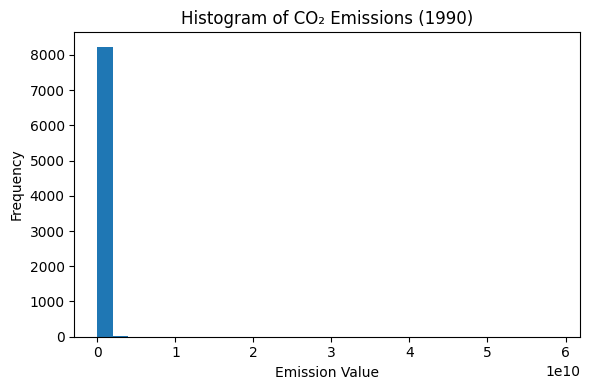

Insight: The histogram of '1990' shows the overall distribution of CO₂ emission values across countries. If the bars are concentrated on the left, it indicates many countries with low emissions, while longer right tails show a few countries with very high emissions (outliers).


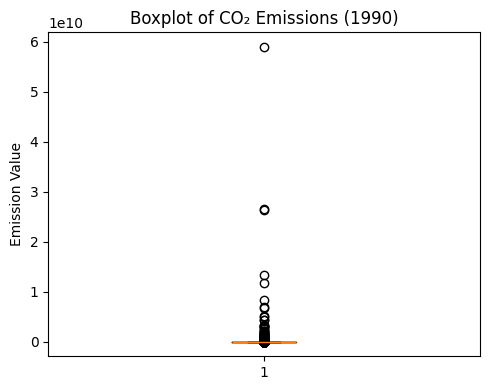

Insight: The boxplot of '1990' visualizes median, quartiles, and outliers. Countries with extremely high CO₂ values appear as points beyond the upper whisker, showing inequality in global emissions.\n


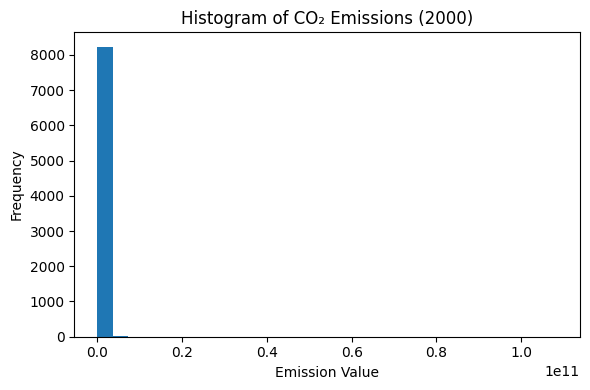

Insight: The histogram of '2000' shows the overall distribution of CO₂ emission values across countries. If the bars are concentrated on the left, it indicates many countries with low emissions, while longer right tails show a few countries with very high emissions (outliers).


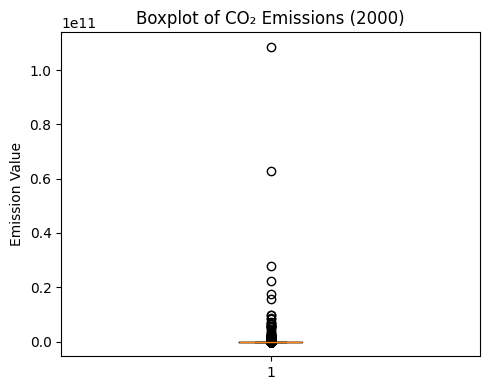

Insight: The boxplot of '2000' visualizes median, quartiles, and outliers. Countries with extremely high CO₂ values appear as points beyond the upper whisker, showing inequality in global emissions.\n


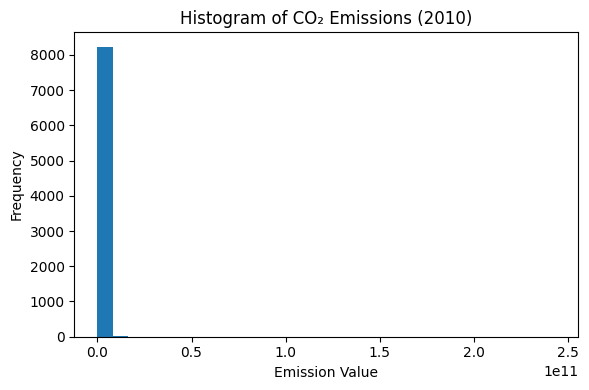

Insight: The histogram of '2010' shows the overall distribution of CO₂ emission values across countries. If the bars are concentrated on the left, it indicates many countries with low emissions, while longer right tails show a few countries with very high emissions (outliers).


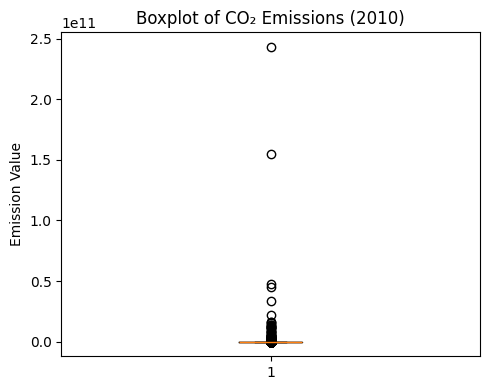

Insight: The boxplot of '2010' visualizes median, quartiles, and outliers. Countries with extremely high CO₂ values appear as points beyond the upper whisker, showing inequality in global emissions.\n


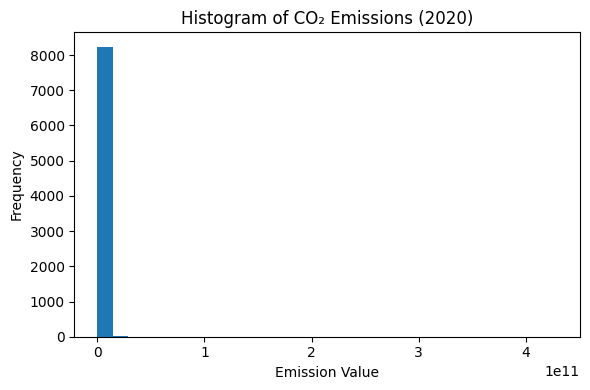

Insight: The histogram of '2020' shows the overall distribution of CO₂ emission values across countries. If the bars are concentrated on the left, it indicates many countries with low emissions, while longer right tails show a few countries with very high emissions (outliers).


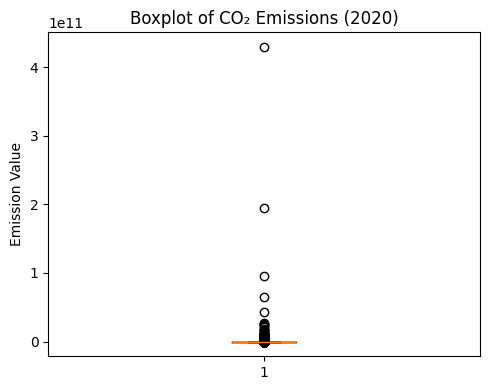

Insight: The boxplot of '2020' visualizes median, quartiles, and outliers. Countries with extremely high CO₂ values appear as points beyond the upper whisker, showing inequality in global emissions.\n


In [114]:
# === 3.1 Univariate Analysis: Numerical Variables ===
import matplotlib.pyplot as plt

# Select a few key years for analysis
years_to_analyze = ['1990', '2000', '2010', '2020']

for year in years_to_analyze:
    if year in df.columns:
        data = df[year].dropna()

        # --- Histogram ---
        plt.figure(figsize=(6,4))
        plt.hist(data, bins=30)
        plt.title(f"Histogram of CO₂ Emissions ({year})")
        plt.xlabel("Emission Value")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        print(f"Insight: The histogram of '{year}' shows the overall distribution of CO₂ emission values across countries. \
If the bars are concentrated on the left, it indicates many countries with low emissions, while longer right tails show a few countries with very high emissions (outliers).")

        # --- Boxplot ---
        plt.figure(figsize=(5,4))
        plt.boxplot(data, vert=True)
        plt.title(f"Boxplot of CO₂ Emissions ({year})")
        plt.ylabel("Emission Value")
        plt.tight_layout()
        plt.show()

        print(f"Insight: The boxplot of '{year}' visualizes median, quartiles, and outliers. \
Countries with extremely high CO₂ values appear as points beyond the upper whisker, showing inequality in global emissions.\\n")
    else:
        print(f"⚠️ Column '{year}' not found in dataset.\\n")


**Interpretation of Year-wise Univariate Analysis without log transfomations**

The histograms for years 1990, 2000, 2010, and 2020 show a **right-skewed distribution**, meaning most countries produce relatively low CO₂ emissions, while a **few countries** have extremely **high emission** values.

Although each year’s **chart** looks **similar in shape**, the overall scale of values increases over time, indicating that global CO₂ emissions have risen.

The similarity in the histogram patterns occurs because emission levels across countries follow the same global trend — a few highly industrialized nations contribute a major portion of emissions, while many developing countries have much lower values.

Boxplots also confirm this trend, showing several outliers (countries with unusually high emissions) beyond the upper whisker each year

**Interpretation of Boxplots for 1990, 2000, 2010, and 2020**

The boxplots for each selected year (1990, 2000, 2010, and 2020) reveal a **similar pattern in the global distribution of CO₂ emissions.**
Each boxplot shows a **low median value** and** several outliers** far above the upper whisker, indicating that while **most countries **produce comparatively** low CO₂ emissions**, a **few countries** contribute exceptionally** high levels.**

This consistent presence of extreme outliers highlights the **inequality in global emissions** — where industrialized nations dominate the higher end of the scale, and the majority of countries remain clustered near the lower emission range.
The flat, **compressed box near the bottom** suggests that the majority of countries are clustered at very low emission values, showing strong inequality in global emissions during that period

Over time, although the overall shape of the boxplots remains similar, the upper range (outlier values) tends to increase, suggesting that total emissions have grown, and the **gap between high- and low-emission countries has widened.**

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


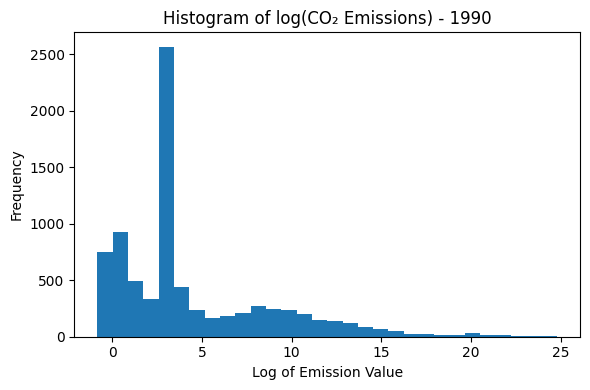

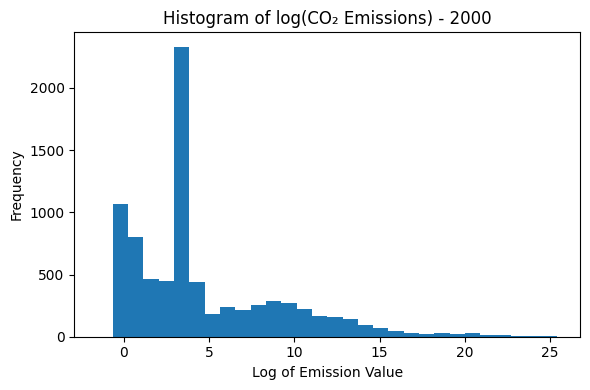

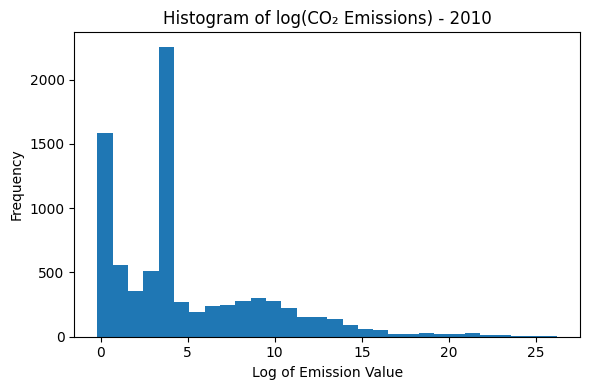

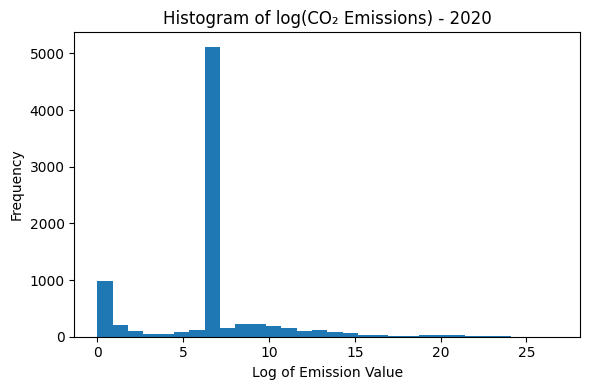

In [112]:
#normalize or log-transform values — this spreads out smaller values and helps visualize growth better:
for year in ['1990','2000','2010','2020']:
    if year in df.columns:
        data = df[year].dropna()
        plt.figure(figsize=(6,4))
        plt.hist(np.log1p(data), bins=30)   # log-transform
        plt.title(f"Histogram of log(CO₂ Emissions) - {year}")
        plt.xlabel("Log of Emission Value")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


Since CO₂ emission values vary greatly between countries, a **logarithmic transformation (log1p)** was applied to **reduce the effect of extreme values**.
This helps reveal the overall **pattern more clearly and allows better comparison of distributions** across different years

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


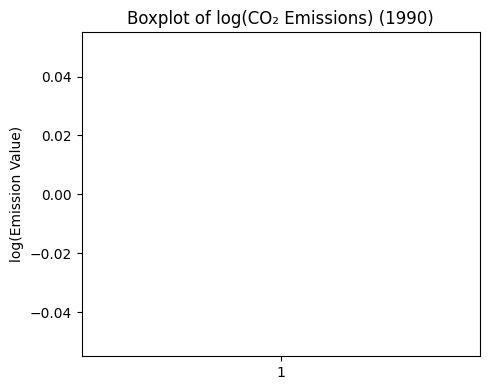

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


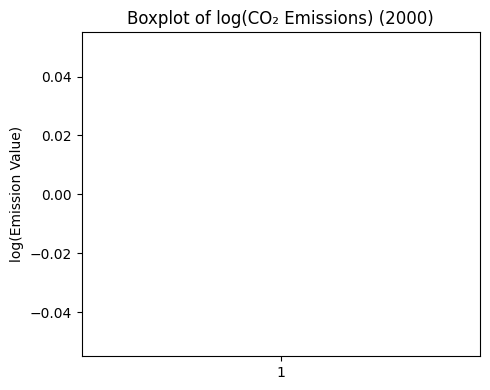

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


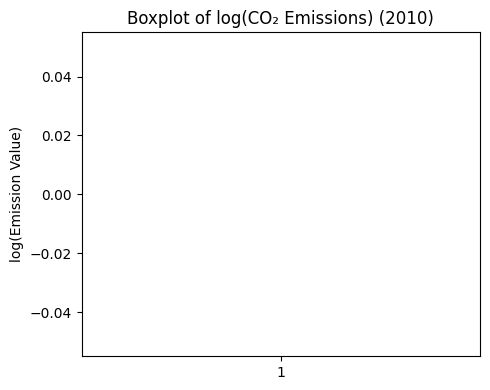

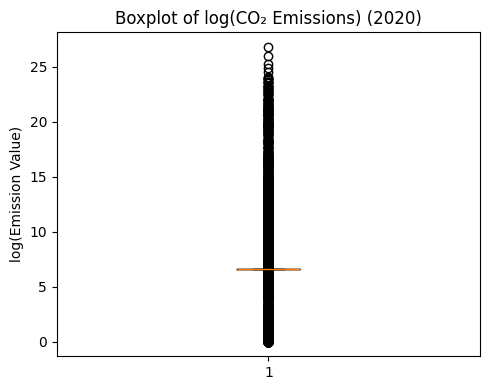

In [116]:
# box plots after log
years_to_plot = ['1990', '2000', '2010', '2020']

for year in years_to_plot:
    if year in df.columns:
        data = np.log1p(df[year].dropna())  # log1p = log(1+x)
        plt.figure(figsize=(5,4))
        plt.boxplot(data, vert=True)
        plt.title(f"Boxplot of log(CO₂ Emissions) ({year})")
        plt.ylabel("log(Emission Value)")
        plt.tight_layout()
        plt.show()


**Summary Insight:**
The comparison between **original and log-transformed visualizations** shows that CO₂ emission data are highly **right-skewed** due to a few large contributors.
The log transformation helps to normalize the data, providing a clearer view of the overall distribution and making statistical analysis more robust.


### 3.2 Categorical — Count Plots & Top Categories


**Univariate analysis for categorical variables** focuses on understanding the **frequency distribution** of each category.
**Count plots **are used to visualize how many** observations** belong to** each category**.

In this dataset, categorical variables such as **“Country Name”** and **"Series Name"** help us identify which countries and which CO₂ emission indicators appear most frequently.
**bold text**
**Count Plot for Country Name:** shows **which countries** have the **highest number of emission** series data recorded.

**Count Plot for Series Name:** shows which **CO₂-related indicators** (like total emissions, emissions per capita, methane, nitrous oxide, etc.) are **most commonly measured**.

These charts provide a quick overview of how the dataset is distributed across categories and ensure that data collection is balanced and representative.

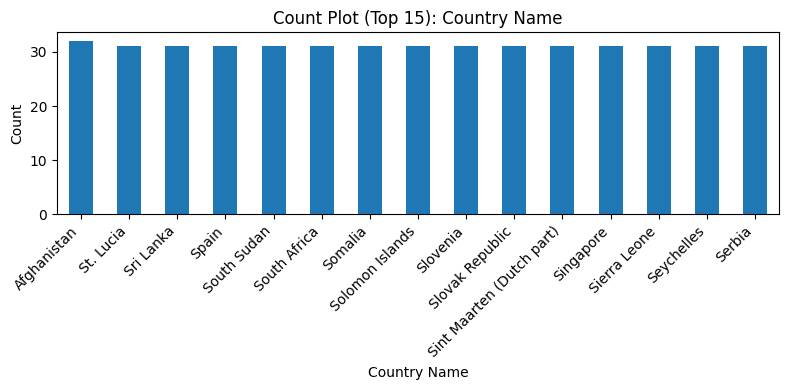

Insight: The count plot for 'Country Name' shows the most frequent categories. For example, the top countries or emission series represent areas with the most recorded data entries, helping identify dominant contributors or commonly tracked indicators.



/tmp/ipython-input-606380806.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


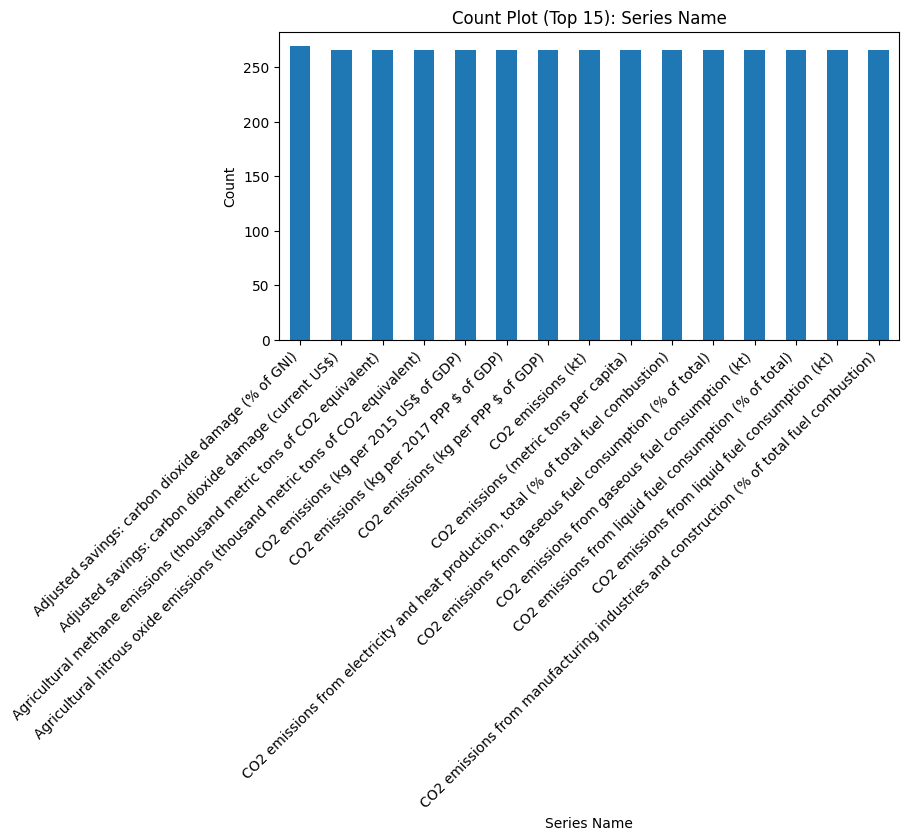

Insight: The count plot for 'Series Name' shows the most frequent categories. For example, the top countries or emission series represent areas with the most recorded data entries, helping identify dominant contributors or commonly tracked indicators.



In [118]:
# 3.2 Univariate Analysis - Categorical Variables

categorical_cols = ['Country Name', 'Series Name']

for col in categorical_cols:
    value_counts = df[col].value_counts().head(15)  # top 15 categories
    plt.figure(figsize=(8,4))
    value_counts.plot(kind='bar')
    plt.title(f"Count Plot (Top 15): {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Insight: The count plot for '{col}' shows the most frequent categories. \
For example, the top countries or emission series represent areas with the most recorded data entries, \
helping identify dominant contributors or commonly tracked indicators.\n")


**The count plots** indicate that certain **countries and emission indicators** dominate the dataset.
A higher number of entries for a country or a series suggests more complete or detailed emission reporting for that entity.
This helps identify which countries have extensive historical CO₂ data and which environmental measures are most tracked globally.


## 4) Bivariate Analysis
**Bivariate analysis** studies the **relationship between two variables**—
either **both numerical or categorical, or one numerical and one categorical.**

We analyze relationships between **two variables** at a time.

- **Numerical vs Numerical:** Scatter plots & correlation coefficients  
- **Categorical vs Numerical:** Boxplots (distribution of numeric by category)  
- **Categorical vs Categorical:** Crosstab heatmap (counts)


###**4.1 Numerical vs Numerical(1990 vs 2020)**

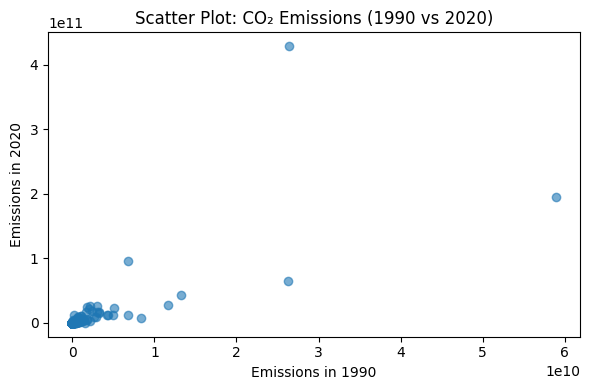

Insight: Correlation between 1990 and 2020 = 0.738.
A positive correlation means countries with high emissions in earlier years tend to remain high emitters later as well.



In [119]:
# 4.1 Numerical vs Numerical(1990 vs 2020)
import matplotlib.pyplot as plt

# Step 4.1 — Numerical vs Numerical
x_year = '1990'
y_year = '2020'

plt.figure(figsize=(6,4))
plt.scatter(df[x_year], df[y_year], alpha=0.6)
plt.title(f"Scatter Plot: CO₂ Emissions ({x_year} vs {y_year})")
plt.xlabel(f"Emissions in {x_year}")
plt.ylabel(f"Emissions in {y_year}")
plt.tight_layout()
plt.show()

corr_val = df[[x_year, y_year]].corr().iloc[0,1]
print(f"Insight: Correlation between {x_year} and {y_year} = {corr_val:.3f}.")
print("A positive correlation means countries with high emissions in earlier years tend to remain high emitters later as well.\n")


**Insight: Scatter Plot (CO₂ Emissions 1990 vs 2020)**

The scatter plot shows **a strong positive relationship between CO₂ emissions in 1990 and 2020.**
Countries that had high emissions in 1990 continue to have high emissions in 2020, which indicates that **global emission patterns remain largely consistent over time.**
Most **points are concentrated near the lower left**, representing countries with **low emissions** in both years, while a **few points** extend toward the **upper right corner** — these correspond to major **industrialized nations** (such as the U.S., China, and India) with very high emission levels.
**bold text**
The correlation suggests that historically high-emission countries have maintained their dominant contribution to global CO₂ output over the decades.

###**4.2 Categorical vs Numerical(Series Name vs 2020)**

/tmp/ipython-input-3708911598.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

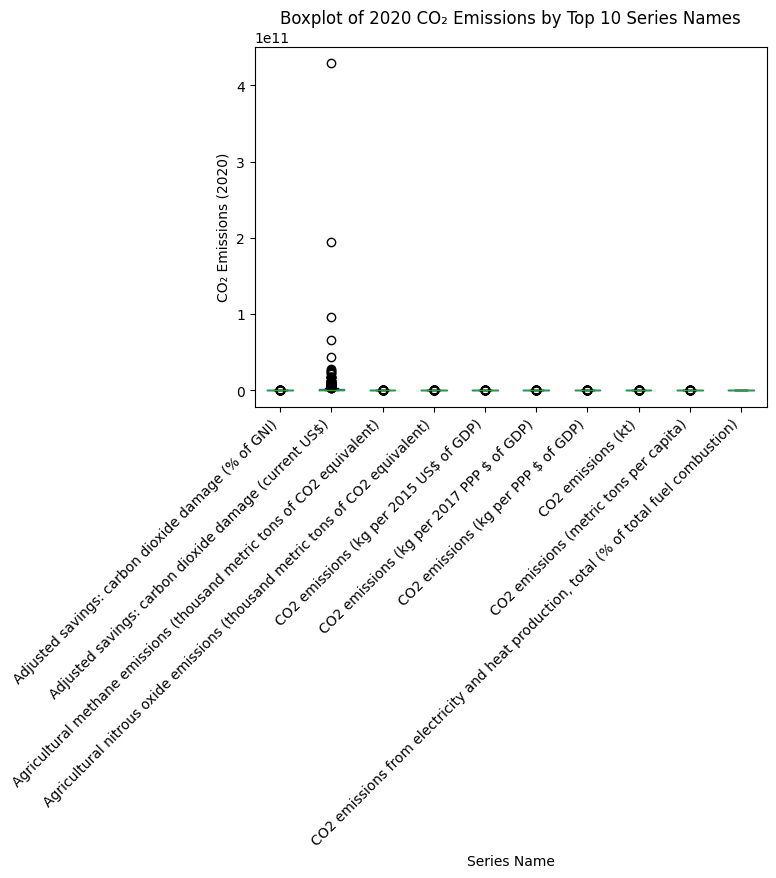

In [123]:
# Step 4.2 — Categorical vs Numerical
top_series = df['Series Name'].value_counts().head(10).index
df_top = df[df['Series Name'].isin(top_series)]

plt.figure(figsize=(10,5))
df_top.boxplot(column='2020', by='Series Name', grid=False)
plt.title("Boxplot of 2020 CO₂ Emissions by Top 10 Series Names")
plt.suptitle("")
plt.xlabel("Series Name")
plt.ylabel("CO₂ Emissions (2020)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight: Boxplot of 2020 CO₂ Emissions by Top 10 Series Names**

The boxplot of** 2020 CO₂ emissions** for the top 10 series names shows **large variation** in emission levels among **different indicators.**
Although most data points lie close to the lower end, a few series display extremely high outlier values, representing emission categories with significantly greater global impact.

**Categories** such as **“CO₂ emissions (kt)”, “CO₂ emissions from electricity and heat production”, and “CO₂ emissions per capita”** exhibit the** highest median and outlier values**, indicating that these sectors contribute **the most to total carbon emissions**.

The** compressed boxes** near the bottom show that other emission types (like agricultural methane or nitrous oxide emissions) have comparatively lower emission magnitudes.
Overall, this visualization highlights the dominant contribution of energy and industrial sectors in global CO₂ emissions during 2020.

###**4.3 Categorical vs Categorical(Country Name vs Series Name)**

/tmp/ipython-input-3344063524.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


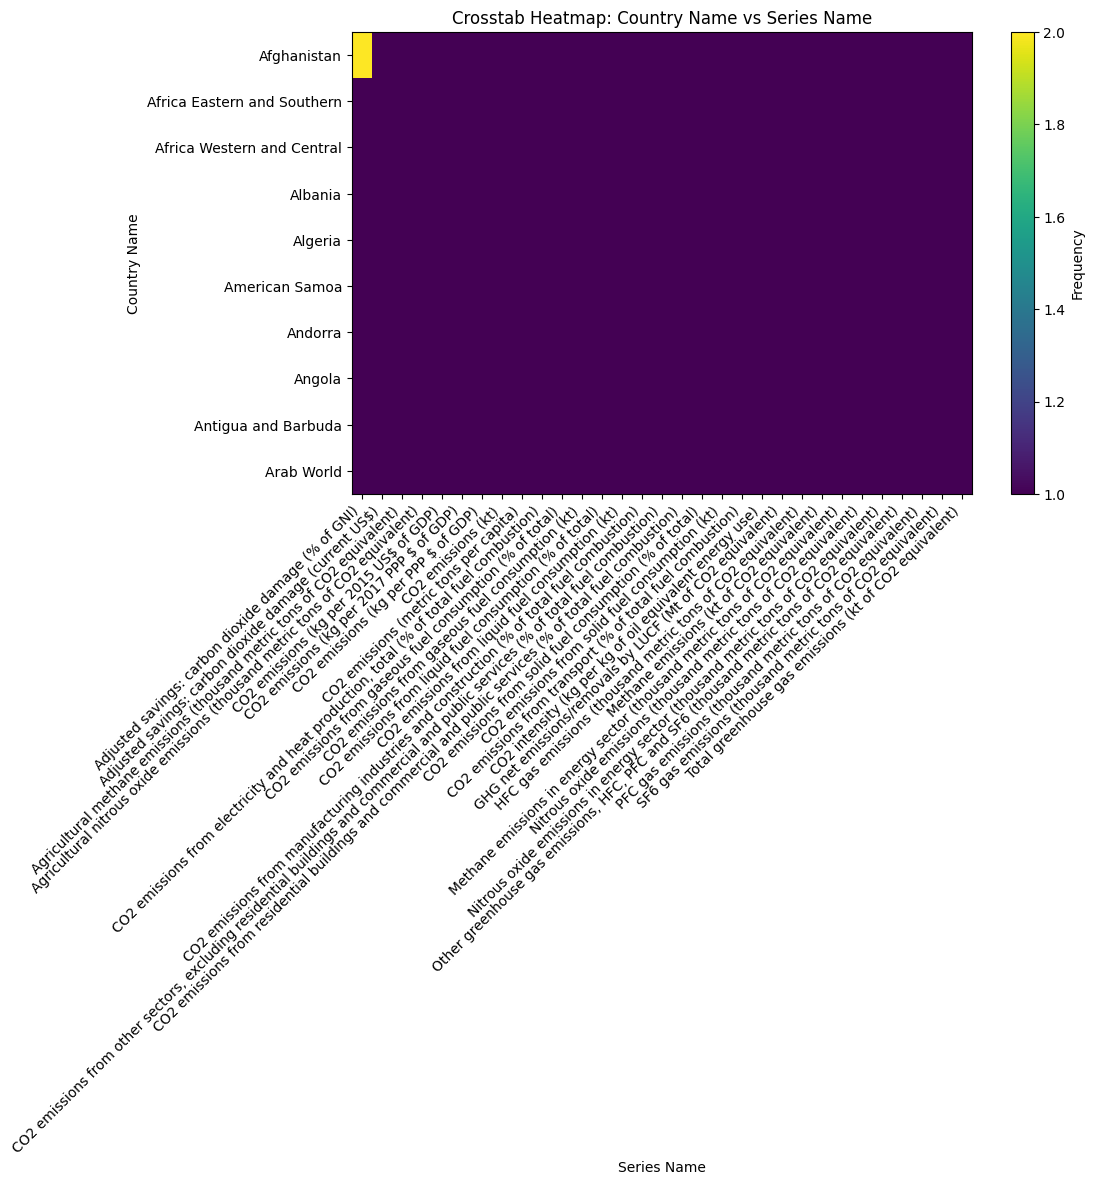

Insight: The heatmap shows how frequently each 'Country Name' has data for different 'Series Name' categories. Darker shades indicate countries reporting more emission indicators, revealing variation in data coverage across nations.


In [121]:
import pandas as pd
import numpy as np

# Step 4.3 — Categorical vs Categorical
cat1 = 'Country Name'
cat2 = 'Series Name'

# Crosstab (limit to avoid huge matrix)
ct = pd.crosstab(df[cat1], df[cat2])
ct_small = ct.head(10)   # first 10 countries for readability

plt.figure(figsize=(10,6))
plt.imshow(ct_small, aspect='auto', cmap='viridis')
plt.title(f"Crosstab Heatmap: {cat1} vs {cat2}")
plt.xlabel(cat2)
plt.ylabel(cat1)
plt.xticks(range(len(ct_small.columns)), ct_small.columns, rotation=45, ha='right')
plt.yticks(range(len(ct_small.index)), ct_small.index)
plt.colorbar(label="Frequency")
plt.tight_layout()
plt.show()

print(f"Insight: The heatmap shows how frequently each '{cat1}' has data for different '{cat2}' categories. \
Darker shades indicate countries reporting more emission indicators, revealing variation in data coverage across nations.")


**Insight: Crosstab Heatmap — Country Name vs Series Name**

The **crosstab heatmap** between Country Name and Series Name shows the **frequency of emission indicators reported by each country.**

The **color intensity** represents how many **emission series are available for each country.**
**Lighter (yellow) shades** indicate countries with **more** recorded indicators, while **darker (purple) areas** show countries with **fewer or missing records**.

From the visualization, it can be observed that most countries have comparable reporting frequencies, suggesting that the dataset contains relatively uniform emission data across nations.
However, a few countries stand out with slightly higher counts, indicating more complete or detailed emission reporting for those nations.

Overall, this heatmap helps identify data coverage consistency and shows that CO₂ and greenhouse gas indicators are tracked across nearly all countries, enabling reliable cross-country comparisons.


## 5) Multivariate Analysis
**Multivariate analysis** explores patterns that involve **three or more variables simultaneously.**
It helps understand how **multiple factors interact together** and how** one variable changes in response to others**.

In this section,** two main analyses** will be performed:

**Grouped Bar Chart:**
A** numerical variable (CO₂ emissions)** is **aggregated by one category (Series Name) and split by another (Country Name)**.
This allows comparison of **multiple categories together.**

**Correlation Matrix (Heatmap):**
A **pairwise correlation among numerical variables (years**) is visualized to identify strong **linear relationships between different time periods.**

These techniques together show how CO₂ emissions evolve over time and differ across countries and emission types.

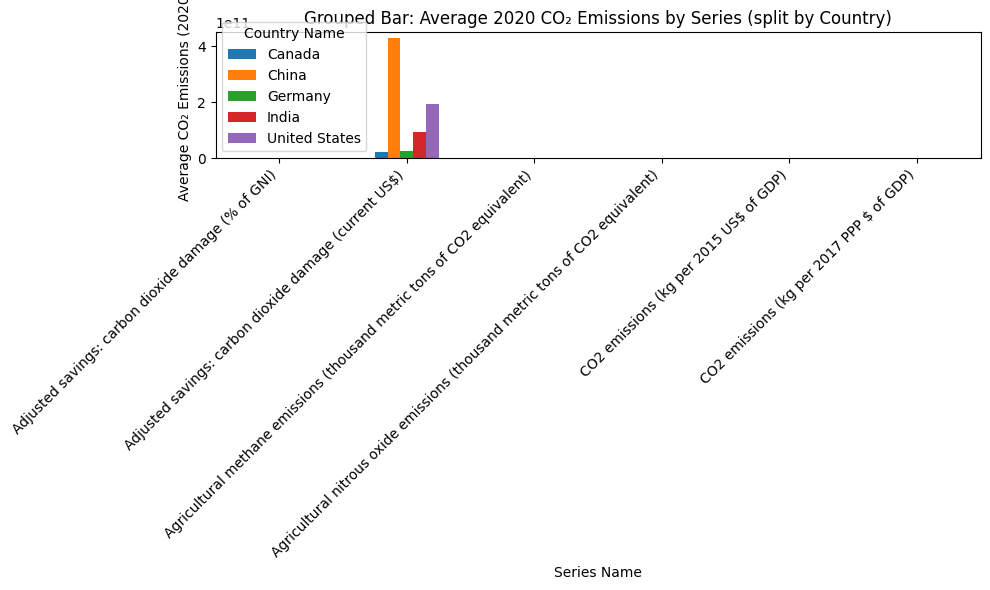

In [124]:
# Step 5.1 — Grouped Bar: Average 2020 emissions by Series Name for a few countries
selected_countries = ['United States', 'China', 'India', 'Germany', 'Canada']
df_group = df[df['Country Name'].isin(selected_countries)]

grouped = df_group.groupby(['Series Name', 'Country Name'])['2020'].mean().unstack()

# Limit to top 6 series for readability
grouped = grouped.head(6)

grouped.plot(kind='bar', figsize=(10,6))
plt.title("Grouped Bar: Average 2020 CO₂ Emissions by Series (split by Country)")
plt.xlabel("Series Name")
plt.ylabel("Average CO₂ Emissions (2020)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Interpretation: Grouped Bar – Average 2020 CO₂ Emissions by Series (split by Country)**

The **grouped bar chart** compares the **average 2020 CO₂ emission **values for selected** emission indicators** across five major countries — **Canada, China, Germany, India, and the United States.**

The chart clearly shows that **China and the United States **have the **highest emission levels **across almost all emission categories, with **China** recording the **most extreme values**, particularly for “Adjusted savings: carbon dioxide damage (current US$)” and “CO₂ emissions (kt)”.

Countries like **Germany and Canada** maintain **moderate emission levels**, while** India** shows ***lower*** but steadily increasing emissions in several categories.

Overall, the **visualization highlights the multivariate relationship among emission type, country, and emission magnitude** — emphasizing that industrial powerhouses remain dominant contributors to global CO₂ emissions in 2020.

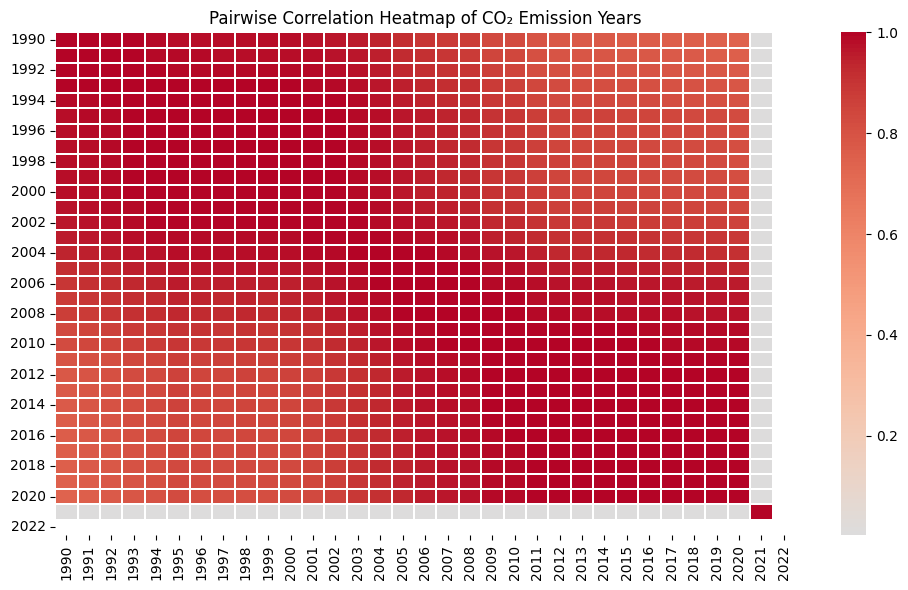

In [126]:
# Step 5.2 — Correlation Matrix (for recent years)
numeric_cols = [str(y) for y in range(1990, 2023) if str(y) in df.columns]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.3)
plt.title("Pairwise Correlation Heatmap of CO₂ Emission Years")
plt.tight_layout()
plt.show()


**Insight: Pairwise Correlation Heatmap of CO₂ Emission Years**

The correlation heatmap displays pairwise relationships between CO₂ emission values across different years (1990–2022).
Most cells appear in darker red shades, showing strong positive correlations between nearly all years.

This means that countries with high CO₂ emissions in earlier years continue to record high values in later years — indicating long-term consistency in emission patterns.

The near-perfect correlations between consecutive years suggest that global CO₂ emissions evolve gradually over time rather than fluctuating abruptly.
The slightly lighter shades in recent years reflect minor data gaps or recent global shifts (like post-2020 COVID-related emission changes).

Overall, this heatmap confirms a stable, strongly correlated emission trend across decades, supporting the idea of persistent industrial and energy-based CO₂ growth globally.


## 6) Correlation Matrix & Heatmap (Numerical)
A **correlation matrix **summarizes the** linear relationships among all numerical variables.**
**Each cell** shows the** correlation coefficient** between a **pair of years**, ranging from **−1 to +1**.

**Values close to +1** indicate a **strong positive correlation** — both variables increase together.

Values **near 0** indicate little or **no linear** relationship.

Values **near −1** show an **inverse relationship.**

The accompanying heatmap visualizes these coefficients, helping to identify strongly related years or variables.

This shows linear relationships among all numerical features.


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1960,1.00,1.00,0.99,0.99,0.99,0.98,0.98,0.97,0.96,0.96,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1961,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.98,0.97,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1962,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1963,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1964,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1965,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1966,0.98,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1967,0.97,0.98,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1968,0.96,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN
1969,0.96,0.97,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0

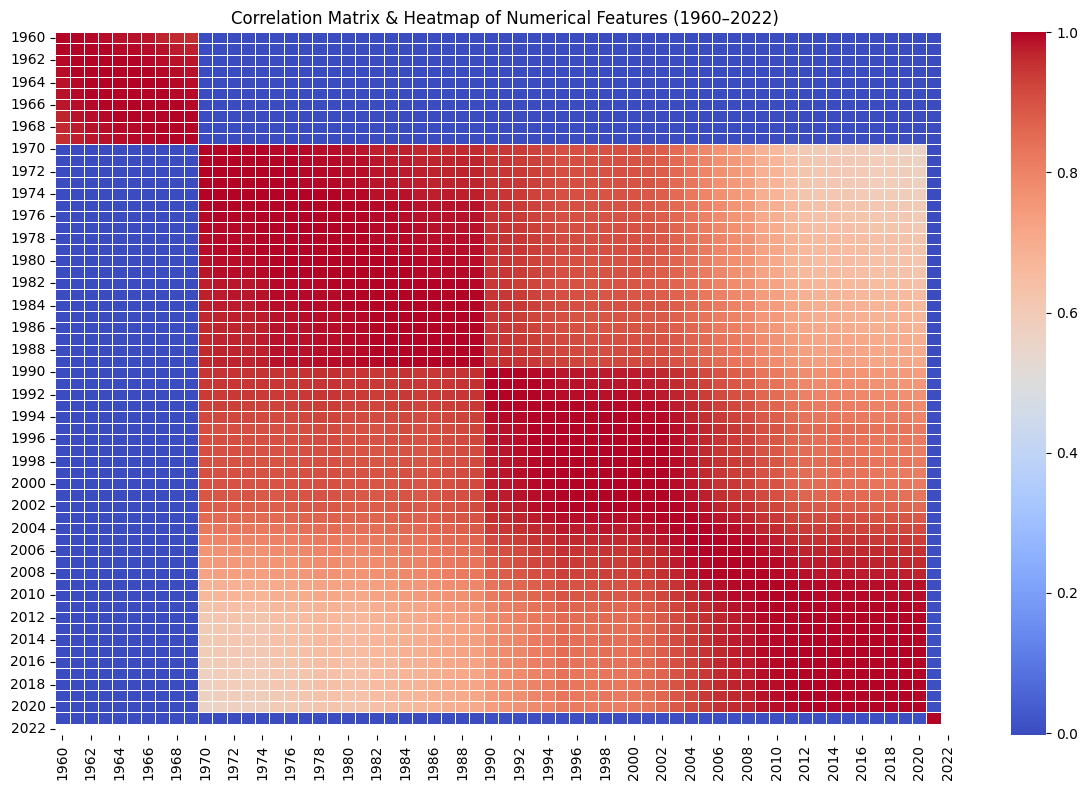

In [127]:
# Step 6 — Correlation Matrix & Heatmap
numeric_cols = [str(y) for y in range(1960, 2023) if str(y) in df.columns]
corr_matrix = df[numeric_cols].corr()

# Display numeric correlation matrix
display(corr_matrix.round(2))

# Visual heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix & Heatmap of Numerical Features (1960–2022)")
plt.tight_layout()
plt.show()


**Insight: Correlation Matrix & Heatmap of Numerical Features (1960–2022)**

The **matrix shows** that most year pairs, especially those **from 1970 onward, exhibit strong positive correlations (deep red shades)**.
This indicates that countries with high CO₂ emissions in earlier decades tend to maintain high emission levels in later years — reflecting long-term stability and growth in global emission trends.

The **relatively lighter or blue regions in early years (1960–1970)** suggest missing or inconsistent data coverage during those periods, leading to weaker correlations.
**From the 1980s onward, the correlation strengthens consistently**, confirming that emission data became more complete and globally aligned.

Overall, the heatmap reveals a highly correlated numerical structure, showing that CO₂ emissions across years move in the same direction, emphasizing the persistent and gradual increase of emissions worldwide over time.


## 7) Key Findings & Next Steps (Write-up)

- **Data types:** Categorical vs Numerical are clearly identified above.  
- **Univariate:** Note skewed distributions or outliers (refer to histograms & boxplots).  
- **Bivariate:** Use the scatter correlations and boxplots to comment on the strongest relationships.  
- **Multivariate:** The grouped bars showed category-wise differences; consider domain-specific interpretations (e.g., region-wise emissions over years).  
- **Correlation:** Highlight top positively and negatively correlated numeric pairs.

**Next Steps (optional):**
- Create derived metrics (e.g., per-capita emissions if `population` exists).  
- Time-series plots (year-wise trends) if a time column exists.  
- Feature selection/engineering for modeling tasks.
